# Sample test

This is yet another collection of questions and answers taken from __[here](https://medium.com/@shraddhaaangiras0911/full-length-qiskit-certification-test-9a4f0b12d5d5)__. As in the other notbeooks, each question is discussed in detail, providing motivation for the correct choice and for excluding the others.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, execute, Aer, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere, plot_error_map, plot_gate_map, plot_state_city
from qiskit.quantum_info import Operator, Statevector, DensityMatrix, state_fidelity, average_gate_fidelity, process_fidelity, partial_trace
from qiskit.circuit.library import XGate, YGate, HGate, CXGate, CRYGate
from qiskit.tools import job_monitor
from math import sqrt, pi

## Questions

### 1. Which plots the bloch sphere of specified spherical coordinates?

- A. `plot_bloch_multivector`
- B. `plot_bloch_coordinates`
- C. `plot_bloch_vector`
- D. `plot_bloch_spherical`

---

The answer is __C__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html#qiskit.visualization.plot_bloch_vector)__, the method `plot_bloch_vector()` of the `qiskit.visualization` module, is defined as 

```
    qiskit.visualization.plot_bloch_vector(bloch, title='', ax=None, figsize=None, coord_type='cartesian', font_size=None)
```

where the `bloch` parameter is specified as follows:

```
    bloch (list[double]) – array of three elements where [<x>, <y>, <z>] (Cartesian) or [<r>, <theta>, <phi>] (spherical in radians) <theta> is inclination angle from +z direction <phi> is azimuth from +x direction
```

which is what we are looking for.

A sample usage of this tool is:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


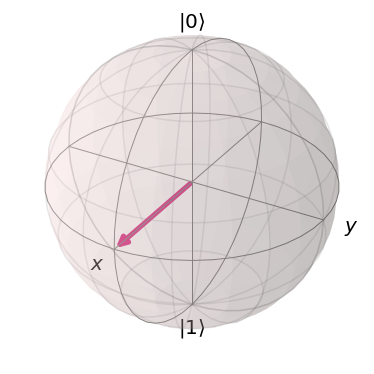

In [3]:
plot_bloch_vector([1, pi/2, 0], coord_type="spherical")

where spherical coordinates have been enabled with the `coord_type="spherical"` parameter, and explicited with the list `[1, pi/2, 0]`, corresponding to ` [<r>, <theta>, <phi>]` (spherical in radians), with `<theta>` being the inclination angle from +z direction and `<phi>` the azimuth from +x direction.

Option A. achieves the same result, but extends to an arbitrary number of qubits (__[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html#qiskit.visualization.plot_bloch_multivector)__). The key difference is that `plot_bloch_multivector()`, takes as input a `state` parameter defined as

```
    state (Statevector or DensityMatrix or ndarray) – an N-qubit quantum state.
```

meaning that it can be called only on already defined `Statevector` or `DensityMatrix` objects, and specifying a set of cartesian or spherical coordinates is not allowed.

Option C. and D. are to be excluded since those methods do not exist within Qiskit in the first place.

---
---

### 2. How can a circuit `bell0` that sets up a maximally entangled state and measures it be created using the circuit below?

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
meas = QuantumCircuit(2)
meas.measure_all()

# Insert code here

- A.

In [ ]:
bell0 = meas.compose(qc)

- B.

In [ ]:
bell0 = meas.join(qc, front=True)

- C.

In [ ]:
bell0 = meas.compose(qc, front=True)

- D.

In [ ]:
bell0 = meas.join(qc)

---

The answer is __C__. The `.compose()` method of a `QuantumCircuit` object (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.compose)__) has the following structure:

```
    compose(other, qubits=None, clbits=None, front=False, inplace=False, wrap=False)
```

where `other` is another `QuantumCircuit` or instruction and the `front` parameter works as:

```
    front (bool) – If True, front composition will be performed. This is not possible within control-flow builder context managers.
```

The latter specification is required since a non-front composition would result in a final circuit where the initial two are switched, as it can be seen if we run it.

First, we initialize the two starting circuits.

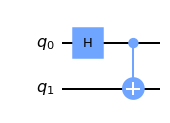

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

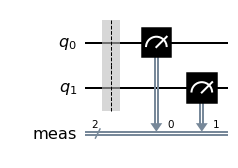

In [8]:
meas = QuantumCircuit(2)
meas.measure_all()

meas.draw(output='mpl')

Then, we compose it according to the chosen answer.

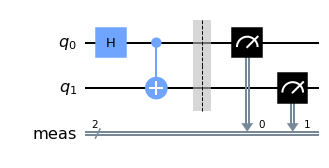

In [9]:
bell0 = meas.compose(qc, front=True)
bell0.draw(output='mpl')

Which is the traditional structure of a circuit that prepares the $\tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$, as required.

Removing the `front=True` parameters would result in

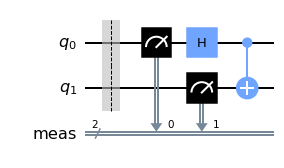

In [11]:
bell0 = meas.compose(qc)
bell0.draw(output='mpl')

Which makes no sense to our purposes. This is the consideration that also excludes option A.

Option B. and D. are not correct since a `QuantumCircuit` object does not have a `.join()` method to start with.

---
---

### 3. Which of these retrieves the qiskit version?

- A. `get_version.__qiskit__`
- B. `qiskit__version__`
- C. `qiskit.get_version`
- D. `qiskit.__version__`

---

The answer is __D__. The version of the installed Qiskit instance can only be retrieved by accessing the `__version__` attribute of the `qiskit` module.

In [2]:
import qiskit

qiskit.__version__

'0.18.3'

The other options are not viable since so such attributes exist in Qiskit.

---
---

### 4. For a quantum circuit `qc` and backend `sim`, which of the following gives the status of a job?

In [ ]:
job = execute(qc, sim)

# Insert code here

- A. `status_monitor(job)`
- B. `job_monitor(job)`
- C. `run_state(job)`
- D. `status_job(job)`

---

The answer is __B__. This is the only option that achieved the desired result, as, according to the __[docs](https://qiskit.org/documentation/apidoc/tools.html#qiskit.tools.job_monitor)__, the method, belonging to the `qiskit.tools` submodule, is defined as

```
    qiskit.tools.job_monitor(job, interval=None, quiet=False, output=<_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>, line_discipline='\r')

    Monitor the status of a IBMQJob instance.
```

A sample usage is as follows:

In [4]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

sim = BasicAer.get_backend("qasm_simulator")
job = execute(qc, sim)

job_monitor(job)

Job Status: job has successfully run


Other options are to be excluded since they do not exist within Qiskit.

---
---

### 5. Which of the code fragments, when inserted into the code below, will print the unitary shown in the output?

In [ ]:
qc = QuantumCircuit(1)

# Insert fragment here

print(q)

Output:

```
[[ 0.70710678+0.j, 0.70710678+0.j], [ 0.70710678+0.j, -0.70710678+0.j]]
```

- A.

In [ ]:
qc.h(0)
q = Operator(qc)

- B.

In [ ]:
qc.h(0)
q = qc.to_gate()

- C.

In [ ]:
q_gate = Operator([[-1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), 1/sqrt(2)]])
qc.append(q_gate,[0])
q = Operator(qc)

- D.

In [ ]:
q = qc.append(HGate(),[0])

---

The answer is __A__. First, if we analyze the given output, we see that is in the form

$$ \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}  $$

which is the exact mathematical description of an $H$ gate. The `Operator` object in `qiskit.quantum_info` (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#operator)__) is associated with a Matrix operator class, and is defined as:

```
    Operator(data, input_dims=None, output_dims=None)
```

where the `data` parameter is

```
    data (QuantumCircuit or Operation or BaseOperator or matrix) – data to initialize operator.
```

This means that `Operator` can take an input a `QuantumCircuit` object and use it as a base to build a matrix operator with the operations contained in the circuit:

In [5]:
qc = QuantumCircuit(1)

qc.h(0)
q = Operator(qc)

print(q)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


Another important aspect is that `Operator` objects have their own default print method that prints to text the given matrix representation, as we jsut saw.

Option B. does not hold because, while identifying the correct operation, the `.to_gate()` method of `QuantumCircuit` returns a `Gate` object, or rather, a pointer to it, meaning that directly printing it would show the address that the object is located at, rather than providing an explicit output.

In [6]:
qc = QuantumCircuit(1)

qc.h(0)
q = qc.to_gate()

print(q)

Option C. is logically equivalent to A., however, it encodes the wrong operator,

```
    [-1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), 1/sqrt(2)]
```

rather than

```
    [1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), -1/sqrt(2)]
```

In [7]:
qc = QuantumCircuit(1)

q_gate = Operator([[-1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), 1/sqrt(2)]])
qc.append(q_gate,[0])
q = Operator(qc)

print(q)

Operator([[-0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


Option D. does not work for the same reason as B., i.e., while the choice of operator is correct, the `.append()` method of the `QuantumCircuit` class returns a `qiskit.circuit.InstructionSet` object, which does not have a custom printing method and therefore showing it results in the visualization of just the address that the associated variable it points to.

In [8]:
qc = QuantumCircuit(1)

q = qc.append(HGate(),[0])

print(q)

---
---

### 6. Which code fragment unrolls to unitary and `cx` gates during execution for the `QuantumCircuit` `qc` and simulator `sim`?

- A. `execute(sim, qc, basis_gates=[‘u’,’cx’])`
- B. `sim.execute(qc, basis_gates=[‘u’,’cx’])`
- C. `execute(qc, sim, basis_gates=[‘u’,’cx’])`
- D. `sim.execute(qc, basis_gates=[‘u1’,’cx’])`

---

The answer is __C__. This is because the `execute()` function (__[docs](https://qiskit.org/documentation/apidoc/execute.html#qiskit.execute_function.execute)__) of the `qiskit.execute_function` module is defined as

```
    qiskit.execute_function.execute(experiments, backend, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, shots=None, memory=None, seed_simulator=None, default_qubit_los=None, default_meas_los=None, qubit_lo_range=None, meas_lo_range=None, schedule_los=None, meas_level=None, meas_return=None, memory_slots=None, memory_slot_size=None, rep_time=None, rep_delay=None, parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None, scheduling_method=None, init_qubits=None, **run_config)
```

with

```
    basis_gates (list[str]) – List of basis gate names to unroll to. e.g: ['u1', 'u2', 'u3', 'cx']. If None, do not unroll.
```

of which the chosen option complies to.

Option A. is quite similar, however the positional arguments `sim` and `qc` are switched in position, and the method would therefore throw an error.

Options B. and D. would again be flagged as incorrect since the variable `sim` is associated with a `Backend` object, which not only does not have an `.execute()` method, but also is a class that should not be inherited directly, since it is mainly used for type checking (__[docs](https://qiskit.org/documentation/stubs/qiskit.providers.Backend.html#qiskit.providers.Backend)__). 

---
---

### 7. Given the below code fragment, which of the following circuits is produced?

```
    'OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[4];
    creg c[3];
    x q[0];
    h q[1];
    ccx q[0],q[1],q[3];
    y q[3];
    z q[2];'
```

- A.

![q7a](./imgs/q7a.png)

- B.

![q7b](./imgs/q7b.png)

- C.

![q7c](./imgs/q7c.png)

- D.

![q7d](./imgs/q7d.png)

---

The answer is __B__. This is the only circuit that directly corresponds to the provided OpenQASM string. The only part that at first may seem offsetting is the $Z$ gate on qubit $q_2$, since it gets instantiated towards the end of the circuit construction but is displayed at the beginning of it. This is because no other options affect qubit $q_2$ before that, and the default plotter tries to optimize the visualization by pushing gates as much leftwards as it can, as in this case.

Options A., B., and D. can be immediately excluded since they all contain $2$ Toffoli gates in them, while the OpenQASM code defines just one.

---
---

### 8. Which three simulators are available in `BasicAer`?

- A. `IBM_simulator`
- B. `qasm_simulator`
- C. `aer_qasm`
- D. `unitary_simulator`
- E. `statevector_simulator`

---

Answers are __B__, __D__, and __E__. From the __[documentation](https://qiskit.org/documentation/apidoc/providers_basicaer.html#module-qiskit.providers.basicaer)__ of `qiskit.providers.basicaer`, the complete list of its simulators is:

```
    QasmSimulatorPy([configuration, provider])              Python implementation of a qasm simulator.

    StatevectorSimulatorPy([configuration, provider])       Python statevector simulator.

    UnitarySimulatorPy([configuration, provider])           Python implementation of a unitary simulator.
```

All the other answers are non-existent, neither within `BasicAer`, nor any other Qiskit provider.

---
---

### 9. Which three code fragments code the below circuit if the barrier is removed?

![q8](./imgs/q8.png)

- A.

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.t(0)
qc.t(0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)

- B. 

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)

- C.

In [ ]:
qc = QuantumCircuit(1,1)
qc.measure_all()

- D.

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)

- E.

In [ ]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)

---

Answers are __A__, __B__, and __E__. First, option A. is simply the one that directly translates to the circuit shown in the figure.

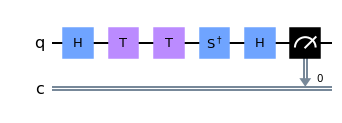

In [9]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.t(0)
qc.t(0)
qc.sdg(0)
qc.h(0)

qc.measure(0,0)
qc.draw(output="mpl")

Options B. and E. follow from the consideration that the `.barrier()` method is not only simply a visualization tool. Its other purpose it that of forcing the transpiler to avoid optimization of the circuit, for example to test the effect of noise within the operations, as explained __[here](https://medium.com/arnaldo-gunzi-quantum/what-is-the-barrier-in-qiskit-for-7d1547bebd1)__.

This means that, for example in B., that the two consecutive $T$ gates (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TGate.html)__), each corresponding to a Phase gate with a $\pi/4$ phase parameter, as soon as the circuit is transpiled to a specific simulator/real machine, are synthetized into a single Phase gate with a $\pi/2$ phase, which is the same as an $S$ gate.

If the above mentioned synthetization occurs, the newly created $S$ gate gets uncomputed by its adjoint $S^{\dagger}$, i.e., synthetized to an identity, and the same occurs of the two external $H$ gates, which, being Hermitian, cancel each other out, and the result circuit becomes empty, except of course for measurement:

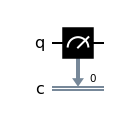

In [15]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.t(0)
qc.t(0)
qc.sdg(0)
qc.h(0)

qc.measure(0,0)

sim = BasicAer.get_backend("qasm_simulator")
transpiled_qc = transpile(qc, sim)

transpiled_qc.draw(output="mpl")

---
---

### 10. Which simulator can be used to obtain the following output for a given circuit?

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.z(1)

Output:

```
array([ 0.70710678+0.j, 0.70710678+0.j, -0. +0.j, -0. +0.j])
```

- A. `aer_simulator`
- B. `unitary_simulator`
- C. `aer_simulator_density_matrix`
- D. `statevector_simulator`

---

The answer is __D__. This is the only option that selects a simulator capable of evolving directly the statevector of the system's state and providing it as output (__[docs](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html)__). The result of a job run on a `StatevectorSimulator` has a `.get_statevector()` method that extracts the required statevector from the output and returns it in the format shown in the question.

In [19]:
qc = QuantumCircuit(2)

qc.h(0)
qc.z(1)

sv_sim = BasicAer.get_backend("statevector_simulator")
out = execute(qc, sv_sim).result().get_statevector()

out

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

Option A. and B. are syntactically correct, but they are associated with different kinds of simulators, respectively the `AerSimulator` (__[docs](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html)__), which is used to inspect the output's counts and expected values, and `UnitarySimulator` (__[docs](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.UnitarySimulator.html)__), which returns the structure of the unitary used to evolved the defined circuit. None of the result jobs form these two sims will have a suitable `.get_statevector()` method.

Option C. can be excluded sirectly since it referes to a simulator that does not exist within Qiskit.

---
---

### 11. Which of the following code produces the following statevector?

$$ \big[ \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \tfrac{1}{\sqrt{8}} \big] $$

In [ ]:
sv = Statevector.from_label('0000')

#Insert text here

sv_ev = sv.evolve(qc)

- A. 

In [ ]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(q)

- B.

In [ ]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

- C.

In [ ]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(q)

- D.

In [ ]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(q)
qc.cx(0,1)

---

The answer is __A__. The given statevector is a uniform superposition of $8 = 2^3$ states and the most straightforward way to obtain it is to apply an $H$ gate to each qubit of a $3$-qubit system, as the answer gives.

In [28]:
sv = Statevector.from_label('0000')

q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(q)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

The reason for the extra $0$s is that the starting `Statevector` (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector)__) was initialized with the `'0000'` label, i.e., corresponding to a tensor product of $4$ $|0\rangle$ qubits, but the circuit that evolves it only has $3$, meaning that all of the remaining states, those from $|0111\rangle$ to $|1111\rangle$ will be paired with a nullified complex amplitude, from which the result follows.

Option B. builds a circuit that prepares a $GHZ$ state, i.e., an entangled one on $3$ qubits,

$$ \tfrac{1}{\sqrt{2}} (|000\rangle + |111\rangle)$$

which is by definition not uniform:

In [22]:
sv = Statevector.from_label('0000')

q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

Option C. is similar to A., but with the difference that an $H$ gate is applied also to the $4$th qubit, meaning that the result will yield a uniform superposition of the full $16$ states represented by the $4$ qubits:

In [29]:
sv = Statevector.from_label('0000')

q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(q)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

D. on the other hand, while it may seem that prepares a Bell state on the first $2$ qubits, the target is also put in superposition, which maintains the uniformity within the circuit, since we have

$$ \begin{split} (I \otimes I \otimes CX) H^{\otimes 4}|0000\rangle &= (I \otimes I \otimes CX) (|++\rangle \otimes \tfrac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}) \\
    &= |++++\rangle \end{split} $$

which we obtained by considering that the $CX$ gate can be interpreted as acting on a $4$-qubit system by swapping its first and third amplitudes, which in this case leave the overall state unchanged. We can also see that by running the circuit and observing a result equal to that of option C.

In [30]:
sv = Statevector.from_label('0000')

q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(q)
qc.cx(0,1)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

---
---

### 12. Which of the below statevectors depict the below Bloch sphere?

![q12](./imgs/q12.png)


- A. $ \big[ \tfrac{1}{\sqrt{2}}, \tfrac{1}{\sqrt{2}} \big] $
- B. $ [ -1, 0, 0 ] $
- C. $ \big[ \tfrac{1}{\sqrt{2}}, \tfrac{-1}{\sqrt{2}} \big] $
- D. $ [ -1, 0 ] $

---

The answer is __C__. The standard form for a statevector is that of an array of complex amplitudes associated with the basis states that make up a full qubit state at a particular moment in time. For a single qubit, those states are trivially $2$ in number, so that excludes option B.. Also, the vector in the Bloch representation lies perfectly on the $XY$ plane, signifying a uniform superposition, where the probabilities associated with the amplitudes are equal, which also excludes option D..

Finally, the direction of the arrow points towards the negative half-space, which translates to a negative real part of the coefficient associated with the $|1\rangle$ state, and therefore the given answer.

We can verify that by taking into account that the visualized state is indeed $|-\rangle$, which can be obtained by following an $X$ rotation with an $H$ one, since

$$ HX|0\rangle = |-\rangle $$

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


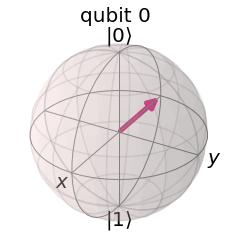

In [35]:
sv = Statevector.from_label('0')

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
qc.h(0)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="bloch")

In [36]:
sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

---
---

### 13. Which of the following code fragments produces the below circuit?

![q13](./imgs/q13.png)

- A.

In [ ]:
qc = QuantumCircuit(2)
op = Operator([[0,1],[-1,0]])
qc.append(op,[0])

- B.

In [ ]:
qc = QuantumCircuit(1)
op = Operator([[1,0],[0,1]])
qc.append(op,[0])

- C.

In [ ]:
qc = QuantumCircuit(3)
op = Operator([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
qc.append(op,[0,1])

- D.

In [ ]:
qc = QuantumCircuit(2)
op = Operator([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
qc.append(op,[0,1])

---

The answer is __A__. As seen before, the `Operator` class can be instantiated by passing a `QuantumCircuit` to it, which then builds up an object representing the evolution described in the circuit. The starting circuit is instantiated on $2$ qubits, while the specified operator is of $2 \times 2$ dimensions, i.e., it is a $1$-qubit operator, which, when appended to the initial `qc` to its $0$-th qubit yields the given result, as it can be seen by running the full code:

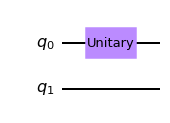

In [38]:
qc = QuantumCircuit(2)
op = Operator([[0,1],[-1,0]])
qc.append(op,[0])

qc.draw(output="mpl")

Option B. does not work since the `QuantumCircuit` here gets instantiated on one qubit, and therefore the second one in the image does not get incorporated into the system.

Option C. also has a mismatch of qubits with respect to the reference image, since the overall circuit is built on $3$ qubits, with the operator being a $2$ one. The latter motivation, is also the cause for option D. not working

---
---

### 14. How many qubits does the below QSphere represent?

![q14](./imgs/q14.png)

- A. $8$
- B. $1$
- C. $4$
- D. $3$

---

The answer is __D__. A QSphere is a Qiskit tool that enables a geometrical representation of a multi-qubit system (contrary to the Bloch sphere, which is associated to representing the state of just a single qubit). In this case, $8$ equally-spaced basis states are represented, those that would result from putting in a uniform superposition $3$ qubits. Note that the state indicators in the sphere are all of the same color, meaning that there is no relative phase difference between each one of them.

This schema can therefore be reproduced by considering:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


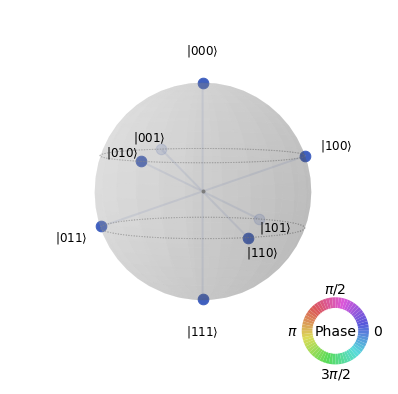

In [4]:
sv = Statevector.from_label('000')

q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(q)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="qsphere")

Another way of plotting a QSphere is by the `plot_state_qsphere` function of the `qiskit.visualization` package, which take as input a `Statevector` or `DensityMatrix` and prints the representation to output. It is also possible to prevent the state labels from being shown to avoid cluttering the plot (as in the reference), by setting `show_state_labels=False`. This argument can also be passed to the standard `QuantumCircuit.draw()` within a dict into its `drawer_args` parameter.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


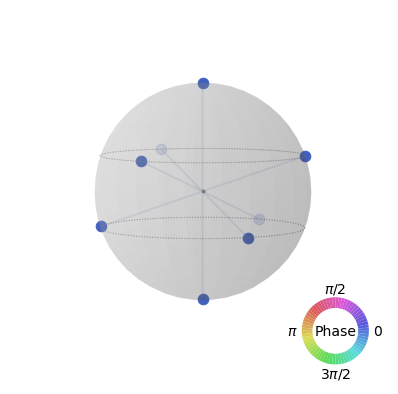

In [6]:
plot_state_qsphere(sv_ev, show_state_labels=False)

This explanation automatically excludes all of the other options.

---
---

### 15. How would you check information on connectivity?

- A. `%qiskit_connection_overview`
- B. `%qiskit_backend_overview`
- C. `%qiskit_backends`
- D. `%connection_info`

---

The answer is __B__. Out of all of the provided Qiskit __[magic commands in the IPython usage](https://ipython.readthedocs.io/en/stable/interactive/magics.html)__, `%qiskit_backend_overview` is the only one that achieves the desired result (__[docs](https://qiskit.org/documentation/apidoc/tools_jupyter.html)__).

The remaining answers are not viable ones as they specify non-existent commands in Qiskit.

---
---

### 16. Which of the following adds new classical bits to store measurements?

- A. `measure`
- B. `measure_all`
- C. `measure_new`
- D. `measure_creg`

---

The answer is __B__. The `.measure_all()` method of `QuantumCircuit` objects (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure_all)__) is defined as

```
    measure_all(inplace=True, add_bits=True)
```

Which, by default, adds new classical bits in  a `ClassicalRegister` to store measurements. If `add_bits=False`, the results of the measurements will instead be stored in the already existing classical bits, with qubit `n` being measured into classical bit `n`. As an example:

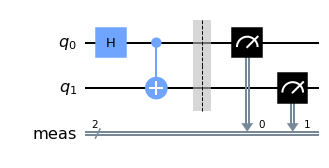

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw(output="mpl")

where, despite no classical register being instantiated at the beginning, a `meas` one has been added by the method.

Option A. would not work as it works by specifying the measurement mapping explicitly with pre-defined classical registers.

Options C. and D. on the other hand, do not exist in Qiskit.

---
---

### 17. What will occur when the following code is executed?

In [ ]:
c = ClassicalRegister(2)
c.draw()

- A. `AttributeError: ‘ClassicalRegister’ object has no attribute ‘draw’`

- B.

![q17b](./imgs/q17b.png)

- C.

![q17c](./imgs/q17c.png)

- D.

![q17d](./imgs/q17d_.png)

---

The answer is __A__. As it can be seen from the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html)__, `ClassicalRegister` objects are not equipped with a `.draw()` method, meaning that running the above code would result in a `AttributeError`, as follows:

In [13]:
c = ClassicalRegister(2)
c.draw()

AttributeError: 'ClassicalRegister' object has no attribute 'draw'

The other options are to be excluded since they rely upon a newly created `QuantumCircuit` object, different from the sole `ClassicalRegister` provided in the question.

---
---

### 18. Which code snippet incorporates the given parameters?

- Uses QASM simulator.
- Measures the circuit 5 times.
- Returns measurement bitstrings.

In [ ]:
qc = QuantumCircuit(1)

# Insert code fragment

- A.

In [ ]:
sim = Aer.get_backend('qasm_simulator')
execute(qc,sim, memory=True, shots=5).result().get_memory()

- B.

In [ ]:
sim = Aer.get_backend('ibm_qasm')
for i in range(5):
    execute(qc,sim, store_memory=True).result().get_memory()

- C.

In [ ]:
sim = Aer.get_backend('qasm_sim')
execute(qc,sim, shots=5).result().get_counts()

- D.

In [ ]:
sim = Aer.get_backend('aer_simulator')
execute(qc,sim, memory=True).result().get_memory()

---
A.

The answer is __A__. From the requirements, the 

```
    sim = Aer.get_backend('qasm_simulator')
```

line is that responsible of choosing the `qasm_simulator` between those available in the `Aer` package. Then, the experiment is repeated $5$ times by setting the `shots=5` parameter of the `execute()` method (__[docs](https://qiskit.org/documentation/apidoc/execute.html#qiskit.execute_function.execute)__), and finally each of the measurement bitstrings (whose storing is enable by `memory=True`) are retrieved by accessing the `.get_memory()` method of the job's result.

This can be verified running

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

sim = Aer.get_backend('qasm_simulator')
execute(qc,sim, memory=True, shots=5).result().get_memory()

['00', '00', '11', '11', '11']

Option B. would not work as there is no such thing as a `ibm_qasm` simulator, as the one selected, just as there is no `store_memory` argument of the `execute()` function. Looping through the number of experiments and executing the circuit at each iteration is not technically wrong, although it represents a bad programming practice, since a new job would be instantiated for every iteration, and each of it would also yield the deafult $1024$ shots, since no other quantity was specified.

For similar consideration, C. and D. can be excluded from potentially correct answers.

---
---

### 19. What would be the result of the following code?

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure(0,0)
sim = Aer.get_backend('aer_simulator')
print(sim.run(qc, shots = 100).result().get_counts())

- A. `{‘1’: 48, ‘0’: 52}`
- B. `{‘0’: 1024}`
- C. `{‘1’: 100}`
- D. `{‘1’: 1024}`

---

The answer is __C__. This is motivated by the identity

$$ HZH = X $$

meaning that the defined circuit does nothing but applying an $X$ gate to the initial $|0\rangle$ qubit, flipping it to $|1\rangle$. Since we are running the circuit on a noiseless simulator, we know that the measured bitstring will yield `1` for every specified shot (`100` in this case).

In [15]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure(0,0)
sim = Aer.get_backend('aer_simulator')
print(sim.run(qc, shots = 100).result().get_counts())

{'1': 100}


Option A. is what we would expect by measuring a 1-qubit state on uniform superposition, where the counts are close to exact halves.

B. yields an incorrect bitstring, and also a wrong count number, `1024`, which would be the shots run by default if no other specification was being made, which is also the reason for excluding D..

---
---

### 20. Which of the following statevectors represent `sv` in the given below code fragment?

In [ ]:
sv = Statevector.from_int(3,2**3)

- A. $ [ 0 1 0 0 0 0 0 0 ] $
- B. $ [ 0 0 1 0 ] $
- C. $ [ 0  0 0 1 ] $
- D. $ [ 0 0 0 1 0 0 0 0 ] $

---

The answer is __D__. The `.from_int()` method of `Statevector` is defined in the __[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.from_int)__ as:

```
    from_int(i, dims)
```

with

```
    - i (int) – the basis state element.
    - dims (int or tuple or list) – The subsystem dimensions of the statevector.
```

meaning that `Statevector.from_int(3,2**3)` is selecting the $3$rd element out of the standard $2^3 = 8$ basis states representing the state of a $3$-qubit system, from which the answer. We can verify that with

In [16]:
sv = Statevector.from_int(3,2**3)
sv.draw(output="latex")

<IPython.core.display.Latex object>

Excluding other options comes straightforward after those such considerations.

---
---

### 21. Which two code fragments implement a $CNOT$ gate between two quantum registers and measure the target?

In [ ]:
q1 = QuantumRegister(1)
q2 = QuantumRegister(1)
c = ClassicalRegister(1)

# Insert code fragment here

- A.

In [ ]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1[0],q2[0])
qc.measure(q2[0], c[0])

- B.

In [ ]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1[0],q2[1])
qc.measure(q2[0], c[0])

- C.

In [ ]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1, q2)
qc.measure(q2[0], c[0])

- D.

In [ ]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1[0],q2[0])
qc.measure(q2[0])

---

Answers are __A__ and __C__. The provided code snippet creates a two `QuantumRegisters`, `q1` and `q2`, of $1$ qubit each. A $CNOT$ gate can be applied in Qiskit by using the `.cx()` method of `QuantumCircuit` (__[docs](https://qiskit.org/documentation/stable/0.36/stubs/qiskit.circuit.QuantumCircuit.cx.html)__), defined as

```
    cx(control_qubit, target_qubit, label=None, ctrl_state=None)
```

meaning that in this single-qubit register case, either the indicized lsit notation in Python or the full name of the register can be used to apply the gate, as in A. and C., respectively:

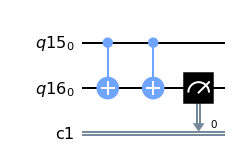

In [18]:
q1 = QuantumRegister(1)
q2 = QuantumRegister(1)
c = ClassicalRegister(1)

qc = QuantumCircuit(q1, q2, c)

qc.cx(q1[0],q2[0]) # option A.
qc.cx(q1, q2) # option C.

qc.measure(q2[0], c[0])

qc.draw(output="mpl")

Option B. would throw an error since, inside the `.cx()` method `q2[1]` is accessed, while `q2` has just one qubit.

Option D. would also throw an error, but for the missing second argument inside the `.measure()` method.

---
---

### 22. A quantum circuit of $2$ qubits is maximally entangled in the state

$$ \tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

When the circuit is measured and plotted, which of the following simulators may show the below result?

![q22](./imgs/q22.png)

- A. `aer_simulator_statevector`
- B. `aer_simulator`
- C. `ibmq_manila`
- D. `qasm_simulator`

---

The answer is __C__. If a circuit is initialized in such maximally-entangled state, by definition one would expect, from a noiseless, classical simulator, to yield measurement of just the $|00\rangle$ and $|11\rangle$ states. However, if the circuit is run and measured on real quantum hardware, such as that of `ibmq_manila`, noise causes some leakage into the other states, causing the imperfect counts shown in the histogram.

All other backends are either non-existent (option A.) or purely classical ones (options C. and D.)

---
---

### 23. What is the value of `in_dim + out_dim`?

In [ ]:
op = Operator(CRYGate(pi))
in_dim, out_dim = op.dim

- A. $3$
- B. $4$
- C. $2$
- D. $8$

---

The answer is __D__. This is because the `dim` attribute of an `Operator` class (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator.dim)__) is such that

```
    Return tuple (input_shape, output_shape).
```

and since the operator is being built on a $CRY$ gate (`CRYGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRYGate.html)__), which is a $2$-qubit gate, we expect it to be of dimensions $4 \times 4$, and therefore the answer. We can see that by considering

In [21]:
op = Operator(CRYGate(pi))
in_dim, out_dim = op.dim

print(f"in_dim: {in_dim}\nout_dim: {out_dim}")

in_dim: 4
out_dim: 4


Excluding the other options comes as straightforward after those considerations.

---
---

### 24. Which gate would transform $\tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $ to $ \tfrac{1}{\sqrt{2}} (|00\rangle + |10\rangle) $ ?

- A. $CX$ gate with qubit $1$ as control and qubit $0$ as target
- B. $CX$ gate with qubit $0$ as control and qubit $1$ as target
- C. $H$ gate applied to qubit 1
- D. $X$ gate applied to qubit 0

---

The answer is __A__. If we take into account Qiskit's ordering convention, where the least significant output bit corresponds to the $0$-th qubit of the circuit, a way to flip the first qubit could be to just apply an $X$ gate to it after the initial state has been prepared; however, this option is not available between the answers, so we choose the alternative that achieved the same result which is a controlled-$X$ gate with target on such first qubit, and control on the zeroth one, which we know is in the $|1\rangle$ state, enabling the $X$ on the former. 

We can see that with

In [6]:
sv = Statevector.from_label("00")

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

which becomes

In [7]:
sv_ev = sv_ev.evolve(CXGate(), [1, 0])

sv_ev.draw(output="latex")

<IPython.core.display.Latex object>

This is the only viable option, all of the other ones are incorrect in either the qubit index the operations are applied to or the gates involved.

---
---

### 25. Which of the following code fragments creates the below circuit?

![q25](./imgs/q25.png)

- A.

In [ ]:
qc = QuantumCircuit(1,1)
qc.append(XGate(),[0])

B.

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)

- C.

In [ ]:
qc = QuantumCircuit(2,1)
qc.append(XGate(),[0])

- D.

In [ ]:
qc = QuantumCircuit(1,1)
qc.x(1)

---

The answer is __A__. The circuit in the image is composed of a $1$-qubit `QuantumRegister` and a $1$-bit `ClassicalRegister`, with an $X$ gate applied to the $0$-th qubit, which is exactly what the chosen answer builds. In fact,

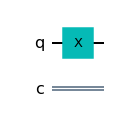

In [8]:
qc = QuantumCircuit(1,1)
qc.append(XGate(),[0])

qc.draw(output="mpl")

Option B. is incorrect in that it misses the integration of a `ClassicalRegister` within the instantiation of the `QuantumCircuit` object.

Option C. defines a `QuantumRegister` of size $2$, one more than actually needed.

Option D. applies an $X$ gate to the qubit indicized by $1$, which is non existent as the circuit as been instantiated with just the $0$-th one.

---
---

### 26. Which statevector represents the state of `q[1]` after the gates below?

![q26](./imgs/q26.png)

- A. $ [0 \: 0] $
- B. $ \big[ \tfrac{1}{\sqrt{2}} \: \tfrac{1}{\sqrt{2}} \big] $
- C. $ [0 \: 1] $
- D. $ \big[ \tfrac{1}{\sqrt{2}} \: \tfrac{-1}{\sqrt{2}} \big] $

---

The answer is __D__. The image is the plot of a circuit built using IBMQ's __[Composer](https://learning.quantum-computing.ibm.com/tutorial/composer-user-guide)__. The zeroth qubit of this $2$-qubit system is first set into the $HX|0\rangle = |-\rangle$ state, and then this is transferred onto the first qubit with a $SWAP$ gate, meaning that at the end, `q[1]` will indeed yield $|-\rangle$. 

We can show that by running

In [25]:
sv = Statevector.from_label("00")

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.swap(0, 1)

sv_ev = sv.evolve(qc)

extracted_sv = partial_trace(sv_ev, [0]).to_statevector()

extracted_sv.draw(output="latex")

<IPython.core.display.Latex object>

where we evolved the starting $2$-qubit `Statevector` with the given circuit, and then extracted the statevector of just the first qubit through the `partial_trace()` method of `qiskit.info` (__[docs](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.partial_trace)__). `partial_trace()` by default returns a `DensityMatrix` object of the extracted quantum state, which we converted back to `Statevector` with the `.to_statevector()` method.

The printed final statevector is indeed the same as that of the option, since they differ just by a global phase. We can double check this consideration by exploiting the `.equiv()` method of `Statevector` (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.equiv)__) which is defined to

```
    Return True if other is equivalent as a statevector up to global phase.
```

In [26]:
extracted_sv.equiv(Statevector.from_label("-"))

True

---
---

### 27. Which statevectors are depicted by the below Bloch spheres?

![q27](./imgs/q27.png)

- A. $ [0 \: 1] $
- B. $ \big[ \tfrac{1}{\sqrt{2}} \: \tfrac{1}{\sqrt{2}} \: \tfrac{-1}{\sqrt{2}} \: \tfrac{-1}{\sqrt{2}} \big] $
- C. $ [0 \: 0 \: 1 \: 0] $
- D. $ \big[ \tfrac{1}{\sqrt{2}} \: \tfrac{1}{\sqrt{2}} \: \tfrac{1}{\sqrt{2}} \: \tfrac{-1}{\sqrt{2}} \big] $

---

The answer is __C__. The depicted Bloch spheres each represent a single-qubit state, respectively, $|0\rangle$ for qubit $0$ and $|1\rangle$ for qubit $1$. This translates to an overall state equal to

$$ |0\rangle \otimes |1\rangle = |01\rangle = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$

Option A. has a statevector of dimension $2$, i.e., it is associated to just a single qubit (qubit $1$ in this case).

Options B. and C. are not valid statevectors in the first place, as the sum of their amplitudes is not unitary.

---
---

### 28. Which of the following circuits would the below code produce?

In [ ]:
qc = QuantumCircuit(3)
qc.barrier(-2)
qc.draw('mpl')

- A.

![q28a](./imgs/q28a.png)

- B.

![q28b](./imgs/q28b.png)

- C.

![q28c](./imgs/q28c.png)

- D. Gives an error: `IndexError: list index out of range`

---

The answer is __A__. The code snippet above instantiates an empty `QuantumCircuit` with just a barrier in it. The barrier is placed at the second to last qubit, that of index `-2`, following Python's list indexing convention, where negative indices indicate looping from the last to first element.

Indeed,

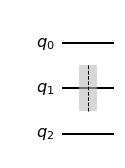

In [29]:
qc = QuantumCircuit(3)
qc.barrier(-2)
qc.draw('mpl')

The only way to have an `IndexError: list index out of range` would be to select an index of a qubit that doesn't exist, i.e., bigger than (or equal to) `3`, in this case.

---
---

### 29. Which of the following constructs a quantum register with $7$ qubits?

- A. `q = QuantumCircuit(7)`
- B. `q = QuantumRegister(0, 7)`
- C. `q = QuantumRegister(0, 6)`
- D. `q = QuantumRegister(7)`

---

The answer is __D__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html#qiskit.circuit.QuantumRegister)__ of `QuantumRegister`, the first positional argument is the size of the register that the circuit gets intantiated with, and therefore the answer.

A. does create a `QuantumRegister` of $7$ qubits, but it does that indirectly, through the instantiation of a `QuantumCircuit`, which is not what we're asked.

B. and C. would result in errors as the second positional argument of a `QuantumRegister` is a `string` with the register name, and not an `int`.

---
---

### 30. Which of the two gates are the same?

- A. `qc.mct([2,1],0)`
- B. `qc.cry(2,1,0)`
- C. `qc.cx(2,1)`
- D. `qc.ccx(2,1,0)`

---

Answers are __A__ and __D__. This is because a multi-controlled Toffoli (`MCXGate`, docs __[here](https://qiskit.org/documentation/stable/0.35/stubs/qiskit.circuit.QuantumCircuit.mct.html)__ and __[here](https://qiskit.org/documentation/stable/0.35/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate)__) with $2$ controls, trivially reduces to a standard Toffoli, which is the same as a `CCX` gate (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CCXGate.html)__ ).

We can verify this with

In [32]:
qc_1 = QuantumCircuit(3)
qc_1.mct([2, 1], 0)

qc_2 = QuantumCircuit(3)
qc_2.ccx(2, 1, 0)

DensityMatrix(qc_1).to_statevector().equiv(DensityMatrix(qc_2).to_statevector())

True

B. is different in that it involves a multi-controlled rotation over the $Y$ axis instead of $X$, while C., differenty from the others, is built on just $2$ overall qubits

---
---

### 31. Which is the default option method used to draw the circuit?

- A. `mpl`
- B. `latex`
- C. `text`
- D. `latex_source`

---

The answer is __C__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.draw)__ of `QuantumCircuit.draw()`, the method is defined as

```
    draw(output=None, scale=None, filename=None, style=None, interactive=False, plot_barriers=True, reverse_bits=None, justify=None, vertical_compression='medium', idle_wires=True, with_layout=True, fold=None, ax=None, initial_state=False, cregbundle=None, wire_order=None, expr_len=30)
```

where the `output` parameter is

```
    output (str) – select the output method to use for drawing the circuit. Valid choices are text, mpl, latex, latex_source. By default the text drawer is used unless the user config file (usually ~/.qiskit/settings.conf) has an alternative backend set as the default. For example, circuit_drawer = latex. If the output kwarg is set, that backend will always be used over the default in the user config file.
```

Other options are also viable output modes for the method, but they have to be explicited and are not set by default.

---
---

### 32. How many qubits does the below QSphere represent?

![q32](./imgs/q32.png)

- A. $4$
- B. $3$
- C. $2$
- D. $1$

---

The answer is __B__. The state labels on the plotted QSPhere directly indicates that number; specifically, the represented quantum state is the standard GHZ state, of the form

$$ \tfrac{1}{\sqrt{2}} (|000\rangle + |111\rangle) $$


Other altenatives can be excluded directly.

---
---

### 33. Which of the following code fragments produces the figure below?

![q33](./imgs/q33.png)

- A. `plot_bloch_multivector([0,0,1])`
- B. `plot_bloch_vector([0,1,0])`
- C. `plot_bloch_cartesian([0,1,0])`
- D. `plot_bloch_multivector([1,0,0])`

---

The answer is __B__. The motives are the same as those of Question 1, with the difference that here, cartesian coordinates are expressed. In this case, the coordinates are interpreted as `[<x>, <y>, <z>]`, meaning that our list `[0, 1, 0]` encodes a vector of norm $1$ pointed only in the $Y$ direction, as the $X$ and $Z$ coordinates are set to $0$.

We show that by running

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


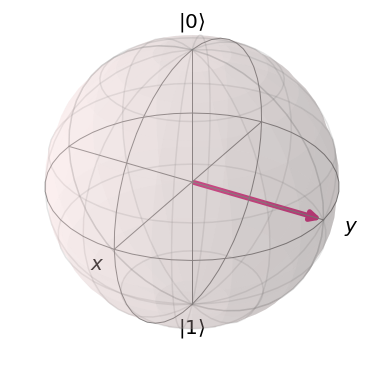

In [3]:
plot_bloch_vector([0, 1, 0])

---
---

### 34. What are the eigenstates of the $X$ axis?

- A. $|+\rangle, |0\rangle$
- B. $|\circlearrowleft\rangle, |\circlearrowright\rangle$
- C. $|0\rangle, |1\rangle$
- D. $|+\rangle, |-\rangle$

---

The answer is __D__. By definition, the $X$ basis is composed of the eigenstates

$$ |+\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle), \:\:\:\:\:\: |-\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle - |1\rangle) $$

of which the orthogonal states are laid on the $X$ axis of the Bloch sphere. This can be also computed directly by finding the eigenstates of the $X$ gate, 

$$ X = \begin{bmatrix}
        0 & 1 \\
        1 & 0
\end{bmatrix} $$

which we do by solving

$$ \text{det}(X - \lambda I) = \lambda^2 - 1 = 0  $$

which gives eigenvalues

$$ \lambda_{1,2} = \pm 1$$

The eigenvectors can be found by choosing an eigenvalue (i. e., $\lambda_1$) and solving 

$$ X \begin{bmatrix} a \\ b \end{bmatrix} = \lambda_1 \begin{bmatrix} a \\ b \end{bmatrix} $$

which has as a result $a = b$, which means, by taking into account normalization, that $ a = b = \tfrac{1}{\sqrt{2}} $, yielding the first eigenvector $v = a|0\rangle + b|1\rangle$ as

$$ |+\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $$

The same process goes for $|-\rangle$.

Option B. contains the eigenvalues of the $Y$ basis, C. those of $Z$ and A. does not contiain suitable orthogonal states to be considered a canonical basis.

---
---

### 35. What is the depth of the below circuit?

In [ ]:
qc = QuantumCircuit(5)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)

- A. $3$
- B. $1$
- C. $2$
- D. $4$

---

The answer is __C__. The depth of a quantum circuit is the length of its critical path, i.e., the highest number of gates that it has to execute within a single wire, without counting anything that is not a gate, such as barriers.

We can also make Qiskit tell us this information by invoking the `.depth()` method (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.depth.html)__) of the `QuantumCircuit` object:

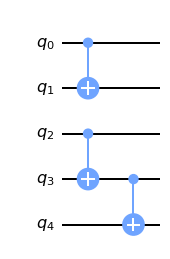

Circuit depth is 2


In [4]:
qc = QuantumCircuit(5)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)

display(qc.draw(output='mpl'))
print(f'Circuit depth is {qc.depth()}')

### 36. Chose the code fragment(s) that produce(s) a $Y$ gate with $3$ controls.

- A.

In [ ]:
y_gate = YGate().control(3)

- B. 

In [ ]:
y_gate = YGate().control(2)

- C.

In [ ]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
y_gate = qc_y.to_gate().control(3)

- D.

In [ ]:
y_gate = Operator(XGate()).control(3)

---

Answers are __A__ and __C__. In A., `YGate` object is based on a `Gate`, whose `.control()` method (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.Gate.html#qiskit.circuit.Gate.control)__) achieves the desired result. The same goes for C., where the gate is first generated from a `QuantumCircuit` with just a $Y$ gate with the `.to_gate()` method (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.to_gate)__).

B. creates a gate with just `2` controls, while D. is also incorrect as `Operator` objects in Qiskit do not possess a `.control()` method similar to that of `Gate`.

---
---

### 37. Which of the following code fragments creates a quantum circuit with $6$ quantum bits and $3$ classical bits?

- A. `qc = QuantumCircuit(6, 3)`
- B. `qc = QuantumCircuit(6)`
- C. `qc = QuantumCircuit(QuantumRegister(6))`
- D. `qc = QuantumCircuit([6,3])`

---

The answer is __A__. The constructor of `QuantumCircuit` is defined as taking as first and second positional arguments the number of qubits and classical bits as `int`s (or a `QuantumRegister` and `ClassicalRegister`), respectively.

---
---

### 38. Which of the following code fragments would produce the illustrated circuit? (select 2)

![q38](./imgs/q38.png)

- A.

In [ ]:
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)
qc.h(q[0:3])
qc.ry(pi/3, anc[0])

- B.

In [ ]:
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)
qc.h(q0, q1, q2)
qc.ry(pi/3, anc[0])

- C.

In [ ]:
q = QuantumRegister(3, name='q(n)')
anc = QuantumRegister(2, name='anc(n)')
qc = QuantumCircuit(q, anc)
qc.h(q[0:3])
qc.ry(pi/3, anc[0])

- D.

In [ ]:
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)
qc.h(q[0:3])
qc.ry(pi/3, 3)

---

Answers are __A__ and __D__. Those are equivalent in any line except for the last one, where the qubit on which the $R_Y$ is applied to is selected first by accessing the `QuantumRegister` it belongs to, and second by indicizing the overall qubits of the `QuantumCircuit`.

The equivalence can be shown as

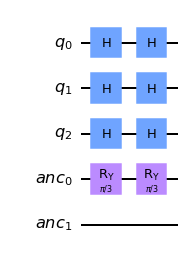

In [5]:
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)

qc.h(q[0:3])
qc.ry(pi/3, anc[0])

qc.h(q[0:3])
qc.ry(pi/3, 3)

qc.draw(output="mpl")

Option B. is to be considered incorrect as the qubits that the $H$ gates are put on are referenced by non-existent variables, rather than being inidicized relative to e. g. the register they are part of.

C. builds the correct set of gates, however the registers' names are inconsistent with the given picture, as by default, they take the provided name and add automatically a subscript with the corresponding index.

---
---

### 39. The $T$ gate is a Qiskit phase gate with what value of the phase parameter?

- A. $\pi/8$
- B. $\pi/2$
- C. $\pi/4$
- D. $\pi$

---

The answer is __C__. A $T$ gate, by definition, is a non-Clifford phase gate which induces a $\pi/4$ phase, also referenced to as the fourth root of Pauli-$Z$ (__[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TGate.html)__).

---
---

### 40. Given this code fragment, what is the probability that the measurement would result in $1$?

In [ ]:
qc = QuantumCircuit(1)
qc.rz(3 * pi/4, 0)

- A. $0$
- B. $0.14645$
- C. $0.85355$
- D. $1$

---

The answer is __A__. By default, every `QuantumCircuit` in Qiskit is initialized in the $|0\rangle$ state, which is an eigenstate of the Pauli-$Z$, meaning that any immediate application of a gate that performs some rotation about the $Z$ axis does not move the starting statevector around the surface of the Bloch sphere. As a consequence, the probability of measuring `1` after such gates is the same as the probability at the start of the circuit, i.e., $0$.

As a proof,

In [8]:
qc = QuantumCircuit(1)
qc.rz(3 * pi/4, 0)

qc.measure_all()

sim = Aer.get_backend("aer_simulator")
res = execute(qc, sim).result().get_counts()

res

{'0': 1024}

i. e., all of the `1024` simulated shots returned the result `0` with probability $1$, or, equivalently, `1` with prob. $0$.

---
---

### 41. Which two code fragments assign a qasm simulator to the variable sim?

- A. `sim = BasicAer.get_backend(‘qasm_simulator’)`
- B. `sim = BasicAer(‘qasm_simulator’)`
- C. `sim = Qasm_simulator()`
- D. `sim = Aer.get_backend(‘qasm_simulator’)`

---

Answers are __A__ and __D__. The only way to access a specific backend in Qiskit is to invoke it from a specific provider (__[docs](https://qiskit.org/documentation/stubs/qiskit.providers.Provider.html#qiskit.providers.Provider)__), in this case `BasicAer` or `Aer` with the `get_backend()` method (__[docs](https://qiskit.org/documentation/stubs/qiskit.providers.ProviderV1.html#qiskit.providers.ProviderV1.get_backend)__), as in the two options.

Other alternatives are simply not defined within the SDK.

---
---

### 42. Which of the follwoing multi-qubit gates rotates the target qubit about the $Z$ axis?

- A.

![q42a](./imgs/q42a.png)

- B.

![q42b](./imgs/q42b.png)

- C.

![q42c](./imgs/q42c.png)

- D.

![q42d](./imgs/q42d.png)

---

The answer is __D__. The gate shown is a $CZ$ (`CZGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html)__), which rotates the target's state around $Z$ according to the control. It is shown symmetrically, with no clear distinction between the control and target since its action is actually the same when those two roles are swapped, as explained __[here](https://quantumcomputing.stackexchange.com/questions/13334/why-is-the-action-of-controlled-z-unaltered-by-exchanging-target-control-qubits/13337#13337)__.

Options A. and B. rotate around $X$ and $Y$, respectively, while C. is a simple $SWAP$ gate.

---
---

### 43. Calculate the depth of the circuit below:

![q43](./imgs/q43.png)

- A. $6$
- B. $2$
- C. $5$
- D. $3$

---
C

The answer is __C__. The motivations are the same as those of Question 35.

We can show the result with

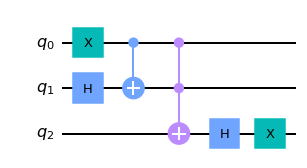

Circuit depth is 5


In [11]:
qc = QuantumCircuit(3)

qc.x(0)
qc.h(1)
qc.cx(0, 1)
qc.ccx(0, 1, 2)
qc.h(2)
qc.x(2)

display(qc.draw(output="mpl"))
print(f"Circuit depth is {qc.depth()}")

---
---

### 44. Which of the following code fragments yields this circuit? (select 3)

![q44](./imgs/q44.png)

- A.

In [ ]:
qc = QuantumCircuit(4)
qc.barrier([2])

- B.

In [ ]:
qc = QuantumCircuit(4)
qc.barrier([-2])

- C.

In [ ]:
qc = QuantumCircuit(4)
qc.barrier(-3)

- D.

In [ ]:
qc = QuantumCircuit(4)
qc.barrier(2)

---

Answers are __A__, __B__, and __D__. The motivations are the same as Question 28.

---
---

### 45. Which of the following assigns a unitary simulator to the variable `sim`?

- A. `sim = aer.get_backend(‘unitary_simulation’)`
- B. `sim = Aer.UnitarySim()`
- C. `sim = Aer.get_backend(‘unitary_simulator’)`
- D. `sim = UnitarySimulator.Aer()`

---

The answer is __C__. Discussions on Qiskit's providers and simulator have already been made, justifying this answer as well.

---
---

### 46. Which of the following simulators is used to obtain the unitary of a circuit?

- A. `aer_simulator_density`
- B. `aer_backend`
- C. `unitary_simulator`
- D. `get_unitary`

---

The answer is __C__. Again, we have seen how the `unitary_simulator` is one of those available within Qiskit's providers, which allows to access a circuit's overall unitary by calling the `.get_unitary()` method (__[docs](https://quantumcomputing.stackexchange.com/questions/13334/why-is-the-action-of-controlled-z-unaltered-by-exchanging-target-control-qubits/13337#13337)__) of the `Result` object returned by the job launched on the simulator.

---
---

### 47. Which of the following histograms depicts a three-qubit entangled state? (select 2)

- A.

![q47a](./imgs/q47a.png)

- B.

![q47b](./imgs/q47b.png)

- C.

![q47c](./imgs/q47c.png)

- D.

![q47d](./imgs/q47d.png)

---

Answers are __A__ and __B__. Respectively, the entangled states that the counts have been plotted on in the two answers are $\tfrac{1}{\sqrt{2}} (|000\rangle + |111\rangle)$ and $\tfrac{1}{\sqrt{2}} (|001\rangle + |110\rangle)$. A. is trivially the standard form of a $GHZ$ state, which we know already is entangled. For B., there are different ways of detecting entanglement of states, but the most straightforward one, which follows directly from the definition, is that the resulting state is not factorizable into lower-order ones.

We can see that by evaluating

$$ \begin{split} &\tfrac{1}{\sqrt{2}} (|001\rangle + |110\rangle) = \\ = &\tfrac{1}{\sqrt{2}} (|00\rangle\otimes|1\rangle + |11\rangle\otimes|0\rangle) \end{split} $$

which cannot be further simplified. Another way is to check that indeed, observing any qubit of one of those states, already tells us the entire state, and therefore also the other, entangled one (e. g., if we measure just qubit $0$, we immediately know that the overall state will be $|110\rangle$.)

Option C. is a uniform superposition of all of the $3$-qubit basis state.

Option D. is a bit trickier to exclude, as we could either imply the aforementioned dependence condition, and notice that for example, if the overall state is 

$$ \tfrac{1}{2} (|000\rangle + |001\rangle + |110\rangle + |111\rangle) $$

then measuring qubit $0$ would still give us the uncertainty of the overall state being $|000\rangle$ or $|110\rangle$; or we could just go ahead and try and factor it, as

$$ \begin{split} & \tfrac{1}{2} (|000\rangle + |001\rangle + |110\rangle + |111\rangle) = \\ &= \tfrac{1}{2} ((|00\rangle + |11\rangle) \otimes |0\rangle + (|00\rangle + |11\rangle) \otimes |1\rangle) = \\ &= \tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \otimes \tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle) = \\
    &= \tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \otimes |+\rangle
\end{split}$$

which indeed shows that the starting state is composite. The factorization also enables us to have a direct way to implement the circuit that generates the state to check that the measured probability distribution corresponds to the given one:

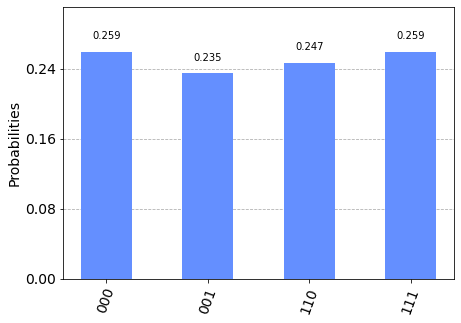

In [14]:
qc = QuantumCircuit(3)
qc.h(1)
qc.cx(1,2)
qc.h(0)

qc.measure_all()

plot_histogram(execute(qc, sim).result().get_counts())

---
---

### 48. What is the process fidelity for gates differing only by a global phase?

- A. $0$
- B. $1$
- C. $0.55$
- D. $0.667$

---

The answer is __B__. From the __[docs](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.process_fidelity)__, the process fidelity $F_{\text{pro}}(\mathcal{E}, \mathcal{F})$  between two quantum channels $\mathcal{E}, \mathcal{F}$ is defined as

$$ F_{\text{pro}}(\mathcal{E}, \mathcal{F}) = F(\rho_{\mathcal{E}}, \rho_{\mathcal{F}}) $$

where $F$ is the state fidelity (__[docs](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.state_fidelity)__), $\rho_{\mathcal{E}} = \Lambda_{\mathcal{E}} / d$ is the normalized Choi matrix (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Choi.html#qiskit.quantum_info.Choi)__) for the channel $\mathcal{E}$ and $d$ is the input dimension of $\mathcal{E}$.

When the target channel si unitary, this is equivalent to

$$ F_{\text{pro}}(\mathcal{E}, U)
    = \frac{Tr[S_U^\dagger S_{\mathcal{E}}]}{d^2} $$

with $S_{\mathcal{E}}, S_{U}$ being the `SuperOp` matrices (__[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SuperOp.html#qiskit.quantum_info.SuperOp)__) for the input channel $\mathcal{E}$ and target unitary $U$ respectively, and $d$ being again the input dimension of the channel.

---
---

### 49. Which of the following will print `1.0`? (select 2)

- A.

In [ ]:
gate1 = Operator(XGate())
gate2 = exp(-1j / 2) * gate1
print(average_gate_fidelity(gate1, gate2))

- B.

In [ ]:
gate1 = Operator(XGate())
gate2 = exp(-1j / 2) * gate1
print(average_process_fidelity(gate1, gate2))

- C.

In [ ]:
print(state_fidelity([0,1],[0,1j]))

- D.

In [ ]:
print(process_fidelity(XGate(), HGate()))

---

Answers are __A__ and __C__. 

---
---

### 50. What would be the state fidelity of the statevectors of the below circuits?

In [ ]:
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)
qc1.x(0)
qc2.z(0)

- A. $1.0$
- B. $0.667$
- C. $0.551$
- D. $0.0$

---
D

The answer is __D__.

---
---

### 51. Which of the following measures the $6$-th qubits in the $5$-th `cbit`?

- A. `qc.measure(5,4)`
- B. `qc.measure(6,5)`
- C. `qc.measure_all()`
- D. `qc.measure_bits(5,6)`

---

The answer is __A__. A discussion has already been made on the `.measure()` and `.measure_all()` methods of `QuantumCircuit`. In this case, it is sufficient to take into consideration that qubits and classical bits are both indexed starting from $0$, meaning that the indices relative to the $6$-th qubit and $5$-th classical bit are `5` and `4`, respectively.

---
---

### 52. What would be the OpenQASM string of a circuit with $1$ qubit in superposition and $1$ cbit?

- A.
```
OPENQASM 2.0;
include “qelib1.inc”;
qreg q[1];
creg c[1];
h q[0];
```

- B.
```
OPENQASM 2.0;
include “qelib1.inc”;
qreg q[1];
creg c[1];
x q[0];
```

- C.
```
OPENQASM 2.0;
include “qelib1.inc”;
qreg q[2];
h q[0];
```

- D.
```
OPENQASM 2.0;
include “qelib1.inc”;
qreg q[1,1];
h q[0];
```

---

The answer is __A__. This is the only one that complies to the requirements and is syntactically correct, in fact,

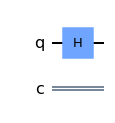

In [4]:
qasm_str = '''OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
h q[0];'''

qc = QuantumCircuit.from_qasm_str(qasm_str)

qc.draw(output="mpl")

B. and C. also run successfully, but they do not meet the requirements of the question.

D. can be excluded as the syntax `qreg q[1,1]` is not a defined one in the QASM language.

---
---

### 53. For the statevector `sv`, how can the hinton plot for the state be produced? (select 2)

- A. `sv.draw(‘hinton’)`
- B. `plot_state_hinton(sv)`
- C. `plot_hinton(sv)`
- D. `sv.draw(‘hinton_plot’)`

---

Answers are __A__ and __B__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.draw)__ of `Statevector.draw()`, we see that an allowed value for the `output` parameter, the first positional one, is indeed `hinton`. Similarly, the function `plot_state_hinton()` (__[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_hinton.html)__) of the `qiskit.visualization` module achieves the same result by passing to it the instantiated `Statevector`.

The other option would instead raise errors as they are not explicited in the correct way.

---
---

### 54. Which code fragment produces the below circuit? 

![q54](./imgs/q54.png)

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

#Insert text here

- A. `qc.draw(background_color = ‘lightblue’)`
- B. `qc.draw(‘mpl’, style={‘backgroundcolor’:’lightblue’})`
- C. `qc.draw(‘latex’, background_color = ‘lightblue’)`
- D. `qc.draw(‘text’, style={‘backgroundcolor’:’lightblue’})`

---

The answer is __B__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.draw)__ of `QuantumCircuit.draw()`, we know that its first positional argument is always the `output` mode, which can be selected among `text`, `mpl`, `latex`, `latex_source`, and also that the `style` parameter is defined as

```
    style (dict or str) – dictionary of style or file name of style json file. This option is only used by the mpl or latex output type. If style is a str, it is used as the path to a json file which contains a style dict. The file will be opened, parsed, and then any style elements in the dict will replace the default values in the input dict. A file to be loaded must end in .json, but the name entered here can omit .json. For example, style='iqp.json' or style='iqp'. If style is a dict and the 'name' key is set, that name will be used to load a json file, followed by loading the other items in the style dict. For example, style={'name': 'iqp'}. If style is not a str and name is not a key in the style dict, then the default value from the user config file (usually ~/.qiskit/settings.conf) will be used, for example, circuit_mpl_style = iqp. If none of these are set, the clifford style will be used. The search path for style json files can be specified in the user config, for example, circuit_mpl_style_path = /home/user/styles:/home/user. See: DefaultStyle for more information on the contents.
```

We can check the answer by running

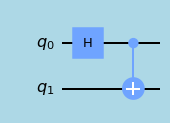

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw('mpl', style={'backgroundcolor':'lightblue'})

In addition, as it is specified, the `style` option can be used only in `mpl` or `latex` styles, meaning that while at first option D. may seem syntactically correct, would still raise an error since it tries to assign a style to a `text` dump.

---
---

### 55. Which of the following shows a figure that depicts readout error of `ibmq_quito`?

- A.

In [ ]:
provider = IBMQ.account()
backend = provider.get_device('ibmq_quito')
plot_error_map(backend)

- B.

In [ ]:
provider = IBMQ.load_account()
backend = provider.get_backend('quito')
plot_gate_map(backend)

- C.

In [ ]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
plot_gate_map(backend)

- D.

In [ ]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
plot_error_map(backend)

---

The answer is __D__. Readout error of a backend is associate with the `plot_error_map()` function (__[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_error_map.html)__) of the `qiskit.visualization` package, which just needs a first positional argument containing a `Backend` object to yield the desiderd result.

A. is wrong in using the non-existent `.get_device()` method of `Provider` to parse the target backend.

B. and C. instead, use the `plot_gate_map()` function, which only shows the layout of the device's qubit structure, without any information on the readout error.

---
---

### 56. Which of the following fragment(s) show the gate map of the device?

- A. `plot_device_gatemap`
- B. `plot_gate_map`
- C. `plot_error_map`
- D. `plot_ibmq_gatemap`

---

Answers are __B__ and __C__. Following from the previous question, those are the only two methods that achieve the visualziation of the gate map of a backend, with the difference that the `plot_error_map` displays additional information on qubit readout error.

---
---

### 57. Which parameter does not display the barriers of the circuit?

- A. `display_barrier=False` in `qiskit.circuit.QuantumCircuit`
- B. `plot_barrier=False` in `qiskit.circuit.QuantumCircuit`
- C. `delete_barriers = True` in `qiskit.circuit.QuantumCircuit.draw`
- D. `plot_barriers=False` in `qiskit.circuit.QuantumCircuit.draw`

---

The answer is __D__. The `plot_barriers` argument is one that is present in just the `QuantumCircuit.draw()` method, which has the description

```
    plot_barriers (bool) – enable/disable drawing barriers in the output circuit. Defaults to True.
```

Any other alternative is not valid as it is not defined within the Qiskit SDK.

---
---

### 58. Which of the following code fragments produces the below histogram?

![q58](./imgs/q58.png)

- A. `plot_histogram([‘000’:450, ‘111’: 550], plot_labels=False)`
- B. `plot_histogram({‘0’:550, ‘1’: 450}, show_label=False)`
- C. `plot_histogram({‘000’:450, ‘111’: 550}, bar_labels=False)`
- D. `plot_histogram({‘000’:40, ‘111’: 550}, show_labels=False)`

---

The answer is __C__. The `plot_histogram()` function of `qiskit.visualization` (__[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html)__) is defined as

```
    plot_histogram(data, figsize=(7, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None, filename=None)
```

with 

```
    data (list or dict) – This is either a list of dictionaries or a single dict containing the values to represent (ex {'001': 130})
```

and

```
    bar_labels (bool) – Label each bar in histogram with counts value.
```

of which just the chosen answer complies to, both in terms of syntax and states/counts displayed.

If we run it,

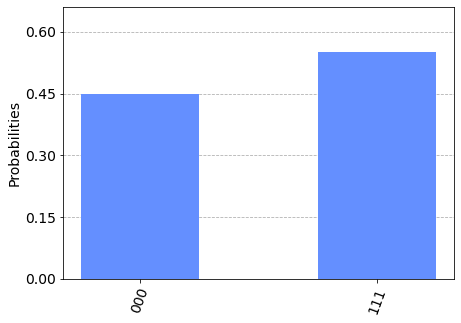

In [11]:
plot_histogram({'000':450, '111': 550}, bar_labels=False)

---
---

### 59. For the statevector `sv`, which of the following yields the below figure?

![q59](./imgs/q59.png)

- A. `plot_state_city(sv)`
- B. `plot_state_city(sv,color=[‘red’,’red’])`
- C. `plot_state_city(sv, hue=[‘red’])`
- D. `plot_state_city(sv, red)`

---

The answer is __B__. From the __[docs](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_city)__ of `plot_state_city()`, we know that it is defined as

```
    qiskit.visualization.plot_state_city(state, title='', figsize=None, color=None, alpha=1, ax_real=None, ax_imag=None, *, filename=None)
```

where 

```
    color (list) – A list of len=2 giving colors for real and imaginary components of matrix elements.
```

with the default colors being `['blue', 'blue']`, meaning that a `['red', 'red']` graph is only shown when explicitly defined, all of which excludes option A., while the others are not viable in the first place.

---
---

### 60. Re-arrange the following to produce a circuit which can be represented by the given statevector.

$$ \big[ \tfrac{1}{\sqrt{2}} \: 0 \: 0 \: 0 \: 0 \: 0 \: 0 \tfrac{-1}{\sqrt{2}} \big] $$

- A. `qc.cx(1,2)`
- B. `qc = QuantumCircuit(3)`
- C. `qc.x(0)`
- D. `qc.cx(0,1)`
- E. `qc.h(0)`

---

The correct sequence is __B__, __C__, __E__, __D__, __A__.

Indeed,

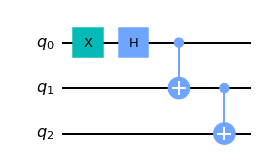

<IPython.core.display.Latex object>

In [3]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

display(qc.draw(output="mpl"))

sv = Statevector.from_label("000")
sv_ev = sv.evolve(qc)

sv_ev.draw(output="latex")

Which is a variation of the circuit that prepares the standard $3$-qubit $GHZ$ state, since

$$ \begin{split} & ((CNOT \otimes I) \otimes CNOT \otimes H\otimes X) |000\rangle = \\ &= (CNOT \otimes I) \otimes CNOT |00-\rangle = \\ &= (CNOT \otimes I) \tfrac{1}{\sqrt{2}} (|000\rangle - |011\rangle) = \tfrac{1}{\sqrt{2}} (|000\rangle - |111\rangle)  \end{split} $$

---
---